# K-means Clustering From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

### Step-1 Initialize K centroids at random place

In [2]:
def place_centroids(k):
    np.random.seed(42)
    centroids = np.random.rand(k, 2)
    return centroids

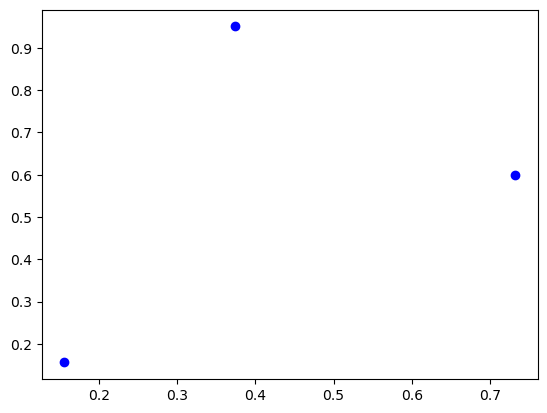

In [3]:
init_centroids = place_centroids(3)
plt.scatter(init_centroids[:,0], init_centroids[:,1], c='b',  )


### Step 2: Compute distance of every point from the centroid and assign each data point to the closest centroid

In [4]:
def k_means_one_round(data: pd.DataFrame, k, centroids, prev):
    groups = []
    group_sums = {i: np.array([0.0, 0.0]) for i in range(k)}
    group_counts = {i: 0 for i in range(k)}

    for _, row in data.iterrows():
        x, y = row[0], row[1]
        min_distance = float('inf')
        closest_centroid = -1

        for i in range(k):
            cx, cy = centroids[i]
            distance = np.sqrt(np.square(cx - x) + np.square(cy - y))
            if distance < min_distance:
                min_distance = distance
                closest_centroid = i

        groups.append(closest_centroid)
        group_sums[closest_centroid] += np.array([x, y])
        group_counts[closest_centroid] += 1

    
    changed_group_count = 0
    new_centroids = []
    for i in range(k):
        if group_counts[i] > 0:
            new_centroid = group_sums[i] / group_counts[i]
        else:
            new_centroid = centroids[i]
        new_centroids.append(new_centroid)

    for i in range(len(prev)):
        if prev[i] != groups[i]:
            changed_group_count += 1


    return np.array(new_centroids), groups, changed_group_count




### Step 3: Repeat Until the grouping converges

In [5]:
def k_means(data: pd.DataFrame, k, centroids):
    changed_groups = data.shape[0]
    curr = centroids
    predicted = [-1] * changed_groups
    
    while changed_groups > 0:
        curr, predicted, changed_groups = k_means_one_round(data, k, curr, predicted)

    return predicted, curr
    

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)

In [8]:
groupings, centroids = k_means(df, 3, init_centroids)

/tmp/ipykernel_65693/3866811243.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x, y = row[0], row[1]


In [17]:
def draw_clusters(centroids, data: pd.DataFrame, predicted):
    
    plt.scatter(centroids[:,0], centroids[:,1], c='purple', marker='x' )
    data['flower'] = predicted

    group1 = data[data['flower'] == 0]
    group2 = data[data['flower'] == 1]
    group3 = data[data['flower'] == 2]

    plt.scatter(group1['petal length (cm)'], group1['petal width (cm)'], c='r')
    plt.scatter(group2['petal length (cm)'], group2['petal width (cm)'], c='g')
    plt.scatter(group3['petal length (cm)'], group3['petal width (cm)'], c='b')


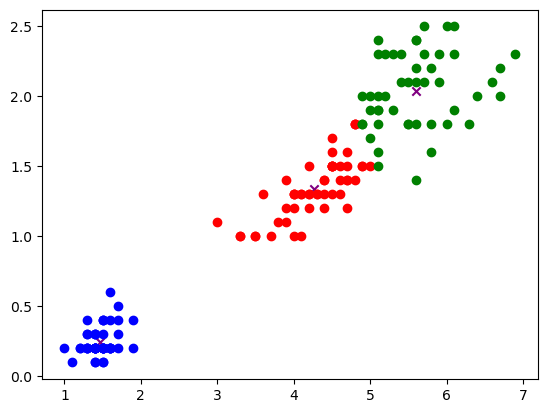

In [18]:

draw_clusters(centroids, df, groupings)